<a href="https://colab.research.google.com/github/sestys/aicrowd_captcha/blob/main/baseline_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt update
!apt install tesseract-ocr
!apt install libtesseract-dev

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [39.1 kB]
Hit:12 http://ppa.launchpad.net/graph

In [19]:
!pip install numpy
!pip install pandas
!pip install pytesseract
!pip install scikit-learn
!pip install textdistance
!pip install tqdm

Download data

In [ ]:
!rm -rf data
!mkdir data
!wget https://datasets.aicrowd.com/default/aicrowd-practice-challenges/public/cptcha/v0.1/train.tar.gz
!wget https://datasets.aicrowd.com/default/aicrowd-practice-challenges/public/cptcha/v0.1/test.tar.gz
!wget https://datasets.aicrowd.com/default/aicrowd-practice-challenges/public/cptcha/v0.1/train_info.csv
!wget https://datasets.aicrowd.com/default/aicrowd-practice-challenges/public/cptcha/v0.1/test_info.csv
!mkdir data/train 
!mkdir data/test
!tar -C data/ -xvzf train.tar.gz
!tar -C data/ -xvzf test.tar.gz
!mv train_info.csv data/train_info.csv
!mv test_info.csv data/test_info.csv

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import pytesseract
import os
import cv2
import matplotlib.pyplot as plt
import textdistance
from tqdm import tqdm
%matplotlib inline

In [14]:
train_info_path = "data/train_info.csv"
test_info_path = "data/test_info.csv"

train_images_path = "data/train/"
test_images_path = "data/test/"
train_info = pd.read_csv(train_info_path)
test_info = pd.read_csv(test_info_path)
print(train_info.shape)
print(train_info.head())

(10000, 2)
      filename      label
0  image_0.png  rFY927C7o
1  image_1.png      Pcyq6
2  image_2.png  wJgfTmcit
3  image_3.png   JNbICISQ
4  image_4.png       T6CD


In [15]:
def plot_image(img_path):
    img = cv2.imread(img_path)
    plt.imshow(img)

100%|██████████| 9/9 [00:00<00:00, 52.22it/s]


Pcyq6
wJgfTmcit
JNbICISQ
T6CD
NygTvaCNs
fWAK
Ml4nOT8m
OmA1zMy
EVp9lGAmLu


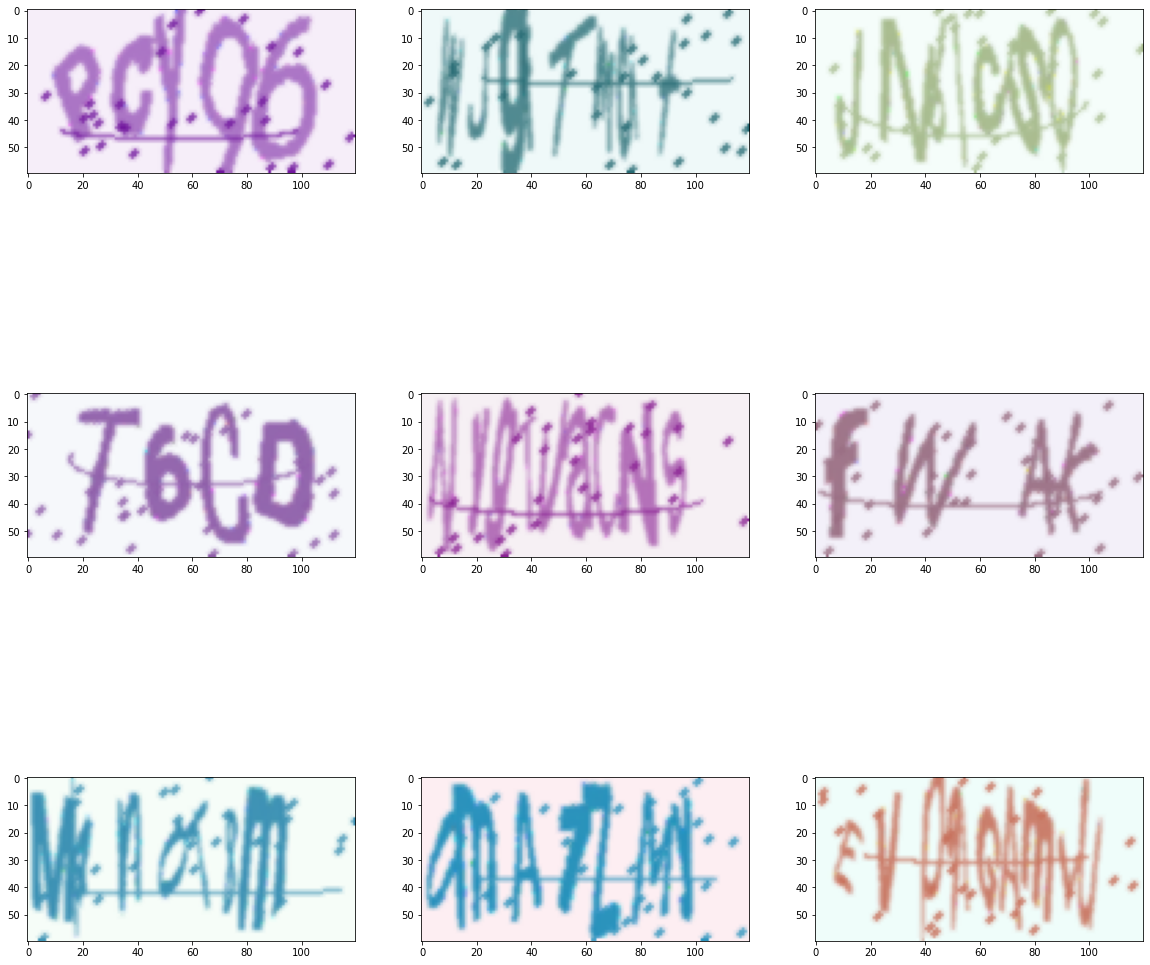

In [21]:
fig=plt.figure(figsize=(20,20))
columns = 3
rows = 3
for i in tqdm(range(1, columns*rows +1)):
    img = train_images_path + train_info['filename'][i]
    label = train_info['label'][i]
    fig.add_subplot(rows, columns, i)
    plot_image(img)
    print(label)
plt.show()

In [17]:
X_train, X_val= train_test_split(train_info, test_size=0.1, random_state=42)

Training

In [ ]:
labels = []
all_filenames = []

for index,rows in train_info.iterrows():
    if index % 500 == 0:
      print(index)
    name = rows['filename']
    img_path = train_images_path + name
    label = pytesseract.image_to_string(Image.open(img_path))
    #Removing garbage characters
    label = label.replace("\x0c","")
    label = label.replace("\n","")
    labels.append(label)
    all_filenames.append(i)
    print(f'{str(index+1)+"/" + str(train_info.shape[0])}\r',end="")
    
    

labels = np.asarray(labels)
all_filenames = np.asarray(all_filenames)


submission = pd.DataFrame()
submission['filename'] = all_filenames
submission['label'] = labels

0
500
1000


In [ ]:
def cal_lshtein_score(s_true,s_pred):
    if type(s_pred) == type(1.0):
        return 0
    score = textdistance.levenshtein.normalized_similarity(s_true,s_pred)                        
    return score

In [ ]:
lst_scores = []
for idx in range(0,len(train_info)):
    lst_scores.append(cal_lshtein_score(train_info['label'][idx],submission['label'][idx]))

mean_lst_score = np.mean(lst_scores)

print("The mean of normalised Levenshtein Similarity score is " ,mean_lst_score)

Test

In [ ]:
labels = []
all_filenames = []

for index,rows in test_info.iterrows():

    i = rows['filename']
    img_path = test_images_path + i
    label = pytesseract.image_to_string(Image.open(img_path))
    #Removing garbage characters
    label = label.replace("\x0c","")
    label = label.replace("\n","")
    labels.append(label)
    all_filenames.append(i)
    print(f'{str(index+1)+"/" + str(test_info.shape[0])}\r',end="")

labels = np.asarray(labels)
all_filenames = np.asarray(all_filenames)


submission_df = pd.DataFrame()
submission_df['filename'] = all_filenames
submission_df['label'] = labels

In [ ]:
submission_df.to_csv('submission.csv', index=False)

Download file from colab

In [ ]:
try:
    from google.colab import files
    files.download('submission.csv') 
except:
    print("Option Only avilable in Google Colab")